In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,RidgeCV, Lasso,LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,root_mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("Boston.csv")

In [3]:
corr=df.corr()

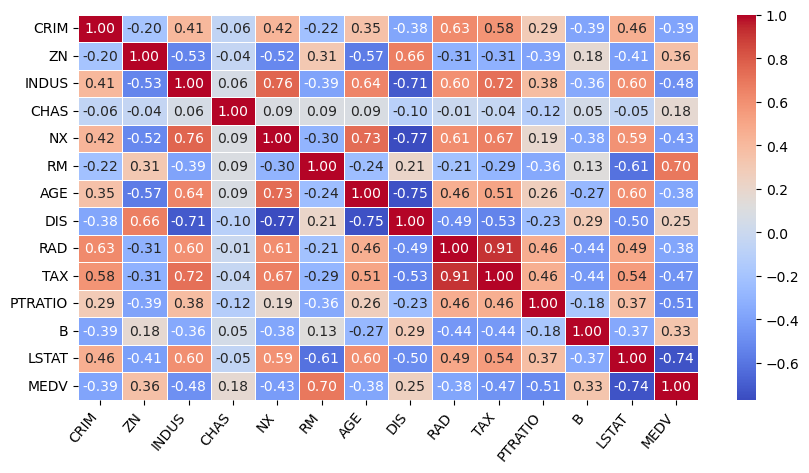

In [4]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,fmt="0.2f",cmap="coolwarm", linewidths=0.6,linecolor="white")
plt.xticks(rotation=50,ha="right")
plt.show()

In [5]:
num_col_name=df.select_dtypes("number").columns

In [6]:
num_col_name

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

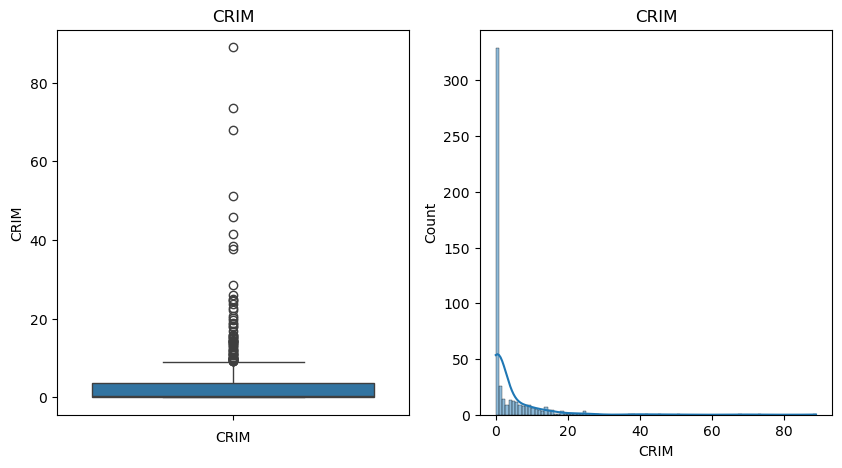

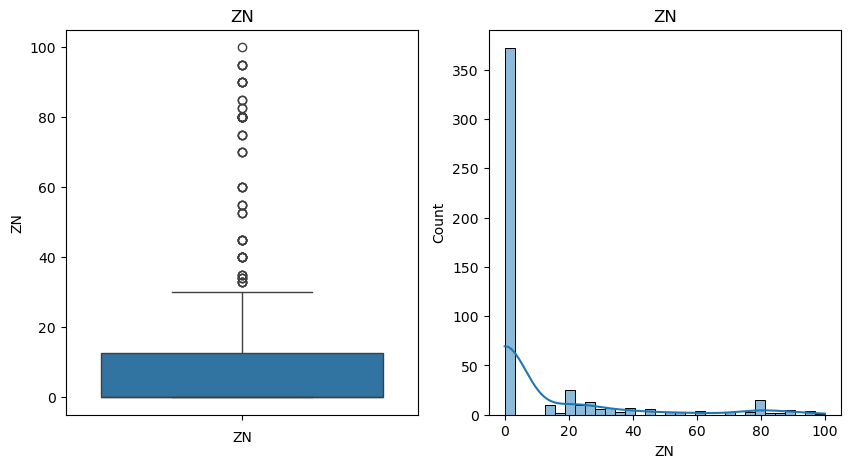

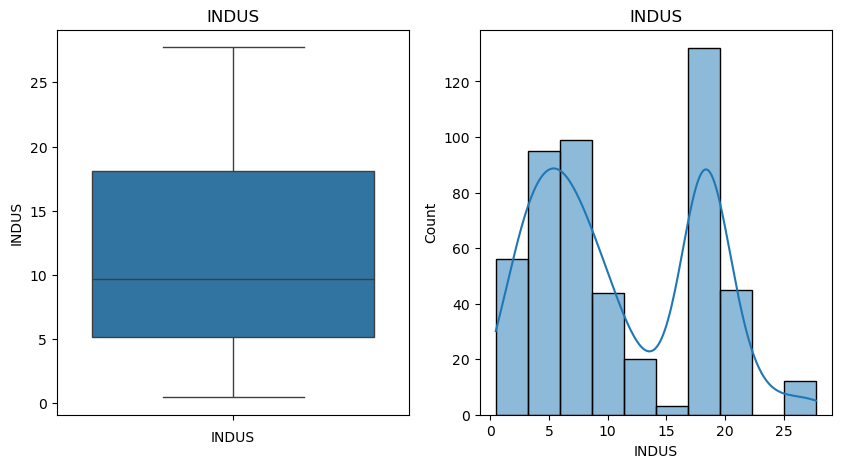

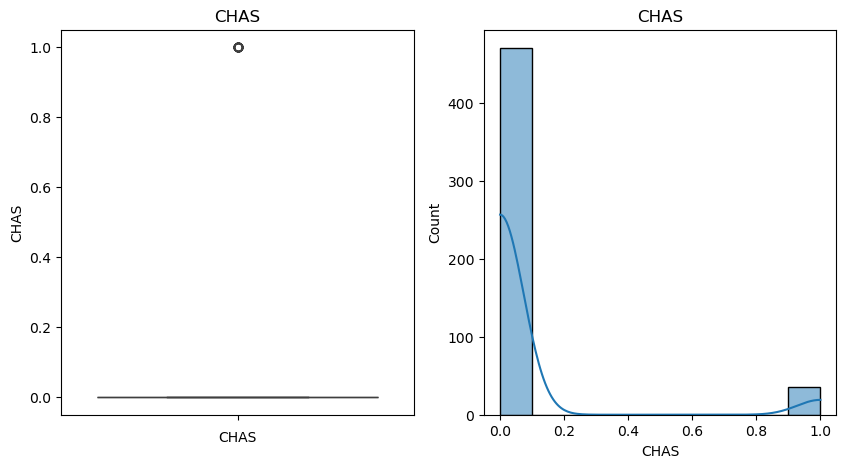

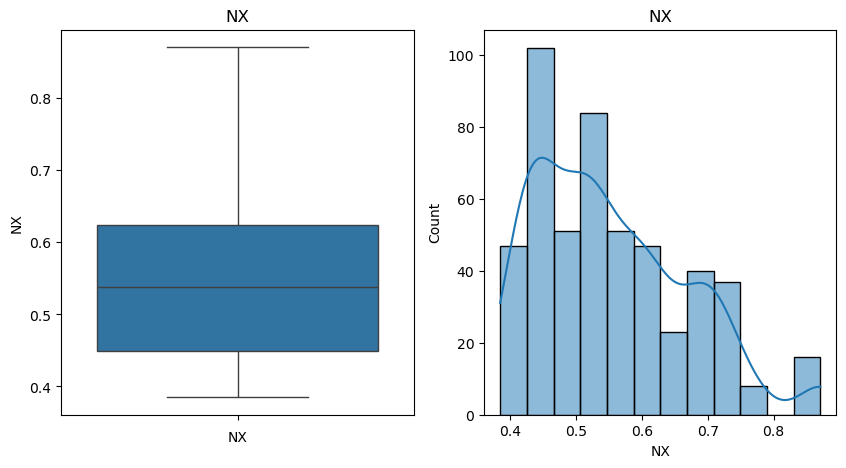

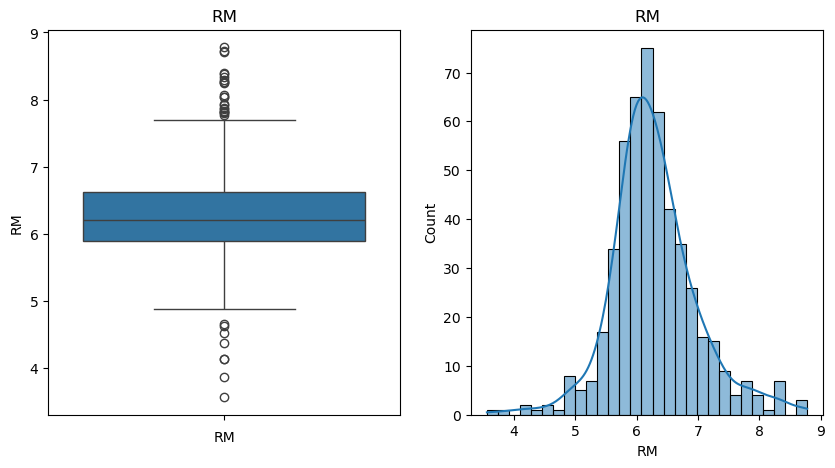

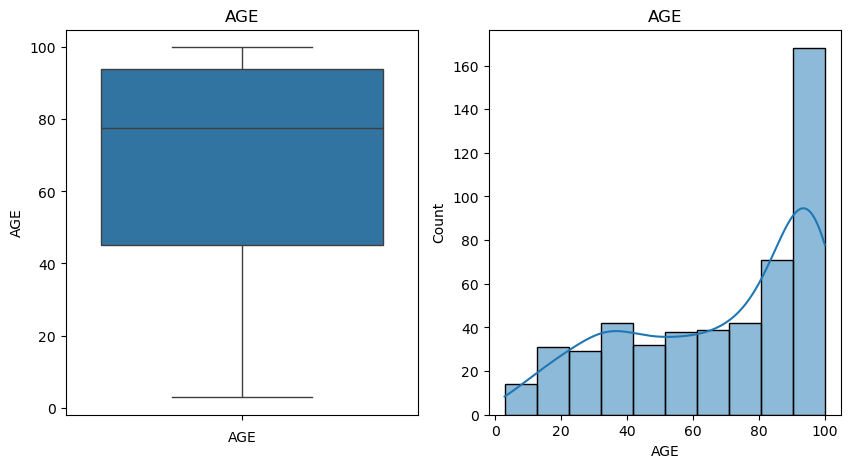

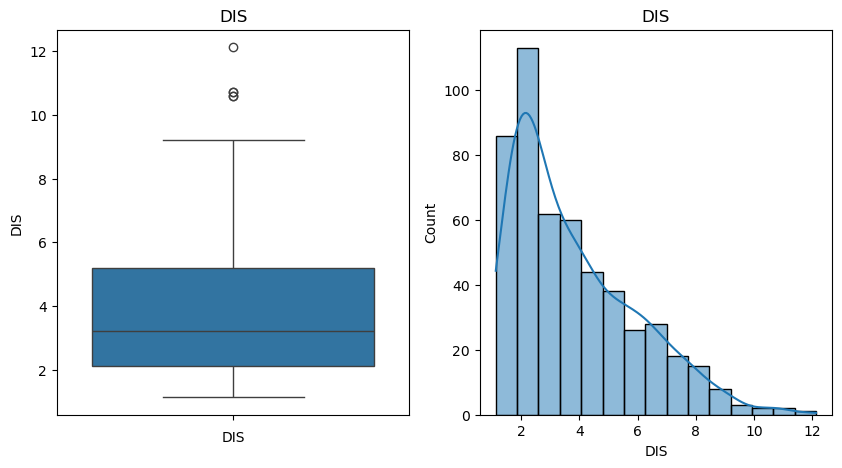

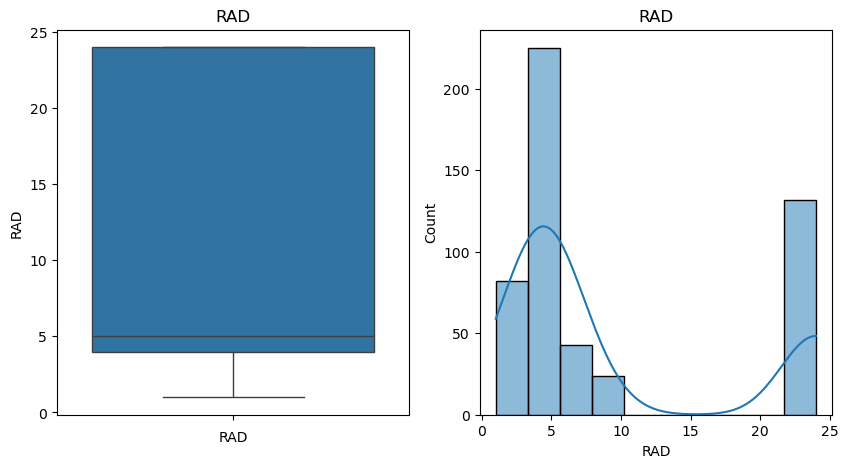

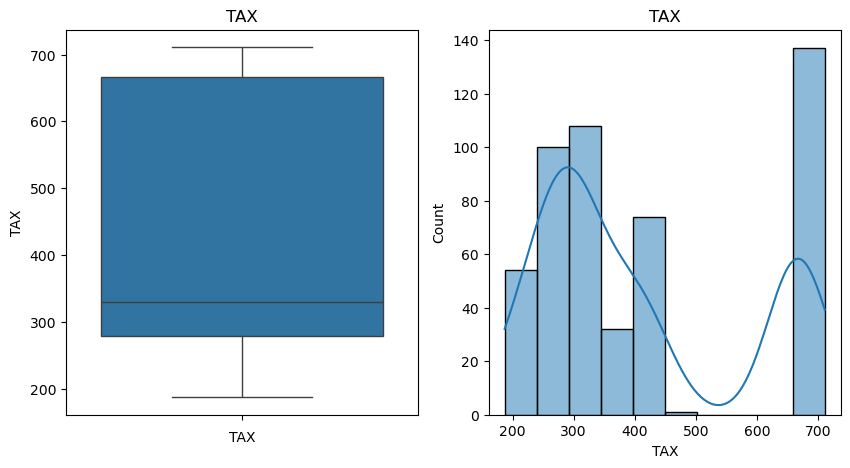

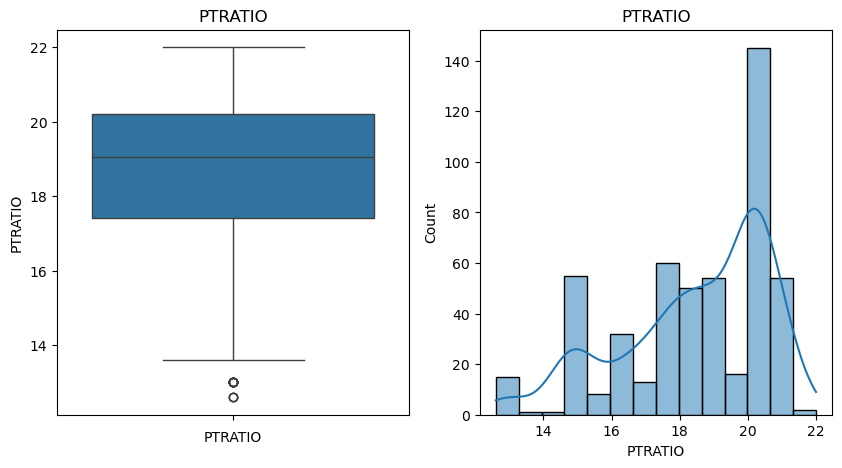

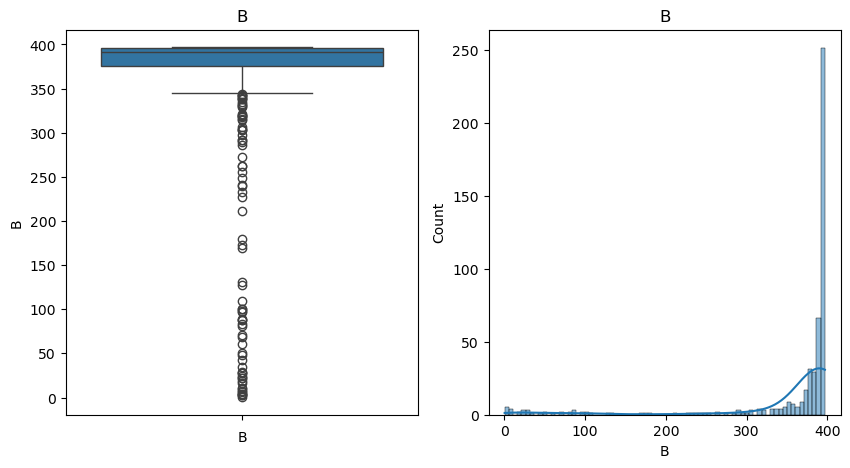

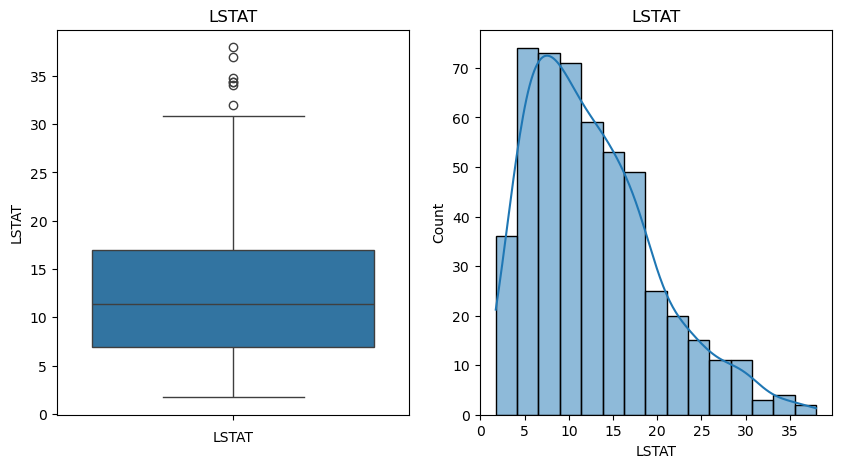

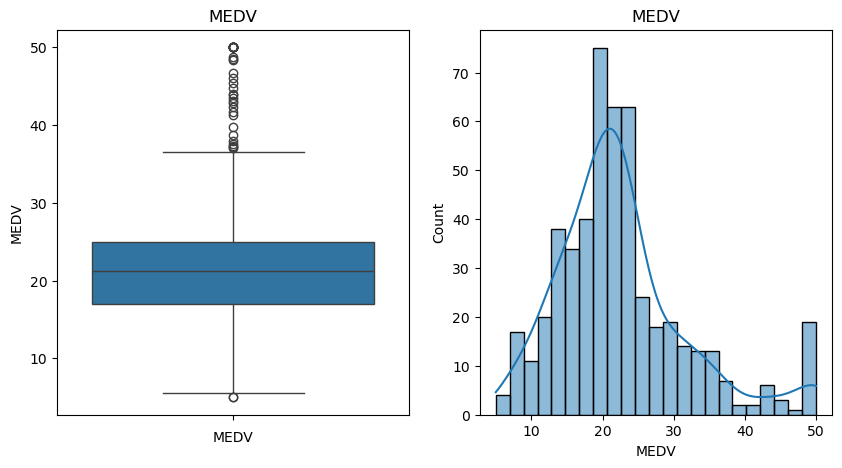

In [7]:
for n in num_col_name:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.subplot(1,2,1)
    sns.boxplot(df[n])
    plt.xlabel(n)
    plt.title(n)
    plt.subplot(1,2,2)
    sns.histplot(df[n],kde=True)
    plt.xlabel(n)
    plt.title(n)
    plt.show()

In [8]:
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NX         0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

In [9]:
z_score_col=['INDUS','NX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']
iqr_col=['CRIM','ZN','CHAS','B']

In [10]:

df_rem_outlier=df.copy()

for n in z_score_col:
    z_upper_limit=df[n].mean()+ 3* df[n].std()
    z_lower_limit=df[n].mean()- 3* df[n].std()
    
    df_rem_outlier[n]=np.where(df[n]>z_upper_limit,z_upper_limit,df_rem_outlier[n])
    df_rem_outlier[n]=np.where(df[n]<z_lower_limit,z_lower_limit,df_rem_outlier[n])
    

In [11]:
for n in iqr_col:
    iqr1=df[n].quantile(.25)
    iqr3=df[n].quantile(0.75)
    
    IQR=iqr3-iqr1
    iqr_upper_limit=iqr3+3*IQR
    iqr_lower_limit=iqr1-3*IQR
    df_rem_outlier[n]=np.where(df[n]>iqr_upper_limit,iqr_upper_limit,df_rem_outlier[n])
    df_rem_outlier[n]=np.where(df[n]<iqr_lower_limit,iqr_lower_limit,df_rem_outlier[n])
    

In [12]:
print(df.skew())
print(df_rem_outlier.skew())

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NX         0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64
CRIM       1.670997
ZN         1.614480
INDUS      0.295022
CHAS       0.000000
NX         0.729308
RM         0.431115
AGE       -0.598963
DIS        0.930068
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -1.553021
LSTAT      0.861746
MEDV       1.108098
dtype: float64


In [13]:
X=df_rem_outlier.drop("MEDV", axis=1)
y=df_rem_outlier["MEDV"]

In [14]:
alphas=np.logspace(-4,4,50)

In [15]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=35)

In [16]:
scaler=StandardScaler()
train_x_scaled=scaler.fit_transform(train_x)
test_x_scaled=scaler.transform(test_x)

In [32]:
cvLasso=LassoCV(alphas=alphas)
cvLasso.fit(train_x_scaled,train_y)
best_alpha=cvLasso.alpha_

In [33]:
best_alpha

0.040949150623804234

In [35]:
lasso_m=Lasso()
lasso_m.set_params(alpha=best_alpha)

Lasso(alpha=0.040949150623804234)

In [36]:
lasso_m.fit(train_x_scaled,train_y)
perd_lasso=lasso_m.predict(test_x_scaled)
r2score=r2_score(test_y,perd_lasso)


In [37]:
print(r2score)

0.6528066681185228


In [39]:
X_scaled=scaler.transform(X)

In [38]:
crossValScore=cross_val_score(lasso_m,train_x_scaled,train_y,cv=20,scoring="r2")
print(crossValScore.mean())

0.7008912948672215
